In [2]:
# Brookes Heil Blackburn
# MAT 5990 - HW3-Q2 - DRAFT

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import integrate
from IPython.display import display, HTML

In [4]:
#plt.style.use('bmh')
plt.rcParams.update({'font.size': 14})
np.random.seed(271828)

# HW03 Problem 2: 
### Solve Forward Problem with $k=0.5$ and $L=10$
### Generate "Exact" Values
1. Simulate the ODE
2. Generate Exact $p$ and Exact $\frac{dp}{dt}$
3. Generate $\Phi_{exact}$
4. Calculate $\theta_{exact}$
5. Calculate Residual of Exact $R(\theta)_{exact}=\Sigma_{i=1}^n (\Phi(x_i)\theta-y_i)^2$

### Compute based on a sweep of $(\Phi=\phi_0, \phi_1,\dots,\phi_K)$ values
1. Input $K$ and enter for loop with $K+1$
2. Build Design Matrix with $K$ $\phi$ columns ($\phi_0$, $\phi_1$, $\dots$, $\phi_K$) based on exact $p$, and $y$ is $\frac{dp}{dt}$
3. Use $\Phi \textcolor{blue}{(nxK)}$ and data($t,\frac{dp}{dt}$) to calculate $\theta \textcolor{blue}{(Kx1)}$ 
4. Calculate $\tilde{L}-L$ and $\tilde{k}-k$
### Visualize 
1. *Need Advice Here*

In [10]:
# get the synthetic data.
# logistic growth "ground truth" variables.
k=0.5
L=10
pert=0.1                            # max percentage multiplicative perturbation
y0 = [1] # initial condition
T = 1 # max time
dt = 0.02 # timestep for observations
K = 10

def funcs(x, K, flag):
    if flag==1:
        phi_array = [x, x**2]
    else:
        phi_array = np.zeros(K+1, dtype=float)
        for m in range(K+1):
            phi_array[m]= x**m
    return phi_array

def f(t,y):
    return k*y*(L-y)

def backward(pert, t, p_b, dpdt_b):
    p = np.random.uniform(1-pert, 1/(1-pert), len(t)) * p_b
    dpdt = np.random.uniform(1-pert, 1/(1-pert), len(t)) * dpdt_b
    return p, dpdt

def loss(phi, theta, y):
    residual = abs( ( Phi @ Theta ) - y )
    return np.sum(residual**2)


# ---------- ODE Solve Sweep Design Matrix Phi-----------------------------------
inputs = np. arange (0.01,0.3, 0.05) # or linspace if you prefer ; tweak as needed
errors_L = np. zeros (np. shape ( inputs ))
max_errors_L = np. zeros ( K+1 )
max_errors_k = np. zeros ( K+1 )
errors_k = np. zeros (np. shape ( inputs ))
p_pert = np. zeros (np. shape ( inputs ))
dpdt_pert = np. zeros (np. shape ( inputs ))

for i in range(2,K+1):
    print(i)
    # ---------- ODE Solve Exact ------------------------------------------
    sol = integrate.solve_ivp(f, [0,20], y0, t_eval = np.arange(0,T+dt,dt))
    t = sol.t
    p_exact = sol.y[0]
    dpdt_exact = f(t,p_exact)
    
    if K == 2:
        Phi_exact = np.array([funcs(pi, i, 1) for pi in p_exact])
        theta_exact = np.linalg.solve(Phi_exact.T @ Phi_exact, Phi_exact.T @ dpdt_exact)
        k_exact = -theta_exact[1]
        L_exact = -theta_exact[0]/theta_exact[1]
    if K > 2:
        Phi_exact = np.array([funcs(pi, i, 0) for pi in p_exact])
        theta_exact = np.linalg.solve(Phi_exact.T @ Phi_exact, Phi_exact.T @ dpdt_exact)
        k_exact = -theta_exact[2]
        L_exact = -theta_exact[1]/theta_exact[2]
    print(f'Approximately, k_e={k_exact:.3f} and L_e={L_exact:.3f}.')
    for j,v in enumerate(inputs):
        # print(j)
        if K == 2:
            p_pert, dpdt_pert = backward(v, t, p_exact, dpdt_exact)
            Phi_pert = np.array([funcs(pi, i, 1) for pi in p_pert])
            theta_pert = np.linalg.solve(Phi_pert.T @ Phi_pert, Phi_pert.T @ dpdt_pert)
            k_pert = -theta_pert[1]
            L_pert = -theta_pert[0]/theta_pert[1]
            errors_L[j] = abs(L_pert - L_exact)
            errors_k[j] = abs(k_pert - k_exact)
        if K > 2:
            p_pert, dpdt_pert = backward(v, t, p_exact, dpdt_exact)
            Phi_pert = np.array([funcs(pi, i, 0) for pi in p_pert])
            theta_pert = np.linalg.solve(Phi_pert.T @ Phi_pert, Phi_pert.T @ dpdt_pert)
            k_pert = -theta_pert[2]
            L_pert = -theta_pert[1]/theta_pert[2]
            errors_L[j] = abs(L_pert - L_exact)
            errors_k[j] = abs(k_pert - k_exact)
            print(f'Approximately, k_p={k_pert:.3f} and L_p={L_pert:.3f}.')
    max_errors_L[i] = np.max(errors_L)
    max_errors_k[i] = np.max(errors_k)
    
df = pd.DataFrame()
df[f'Max k Error $\phi_K$'] = pd.DataFrame(max_errors_k)
df[f'Max L Error $\phi_K$'] = pd.DataFrame(max_errors_L)
styler = df.style.format(escape="latex-math")
display(HTML(styler.to_html()))
# print(L_df)

# print(outputs_L)
# print('L errors: \n',errors_L)
# print('Maximum L errors: \n', np.max(errors_L))
print('Maximum L errors: \n',max_errors_L)
print('Maximum k errors: \n',max_errors_k)
# print(f'Approximately, k={k_pert:.3f} and L={L_pert:.3f}.')
# print(outputs_k)
# print(errors_k)
# print(v_s)

2
Approximately, k_e=0.500 and L_e=10.000.
Approximately, k_p=0.494 and L_p=10.008.
Approximately, k_p=0.474 and L_p=10.149.
Approximately, k_p=0.482 and L_p=9.825.
Approximately, k_p=0.347 and L_p=10.333.
Approximately, k_p=0.289 and L_p=10.348.
Approximately, k_p=0.239 and L_p=10.521.
3
Approximately, k_e=0.500 and L_e=10.000.
Approximately, k_p=0.523 and L_p=9.712.
Approximately, k_p=0.645 and L_p=8.784.
Approximately, k_p=1.191 and L_p=6.527.
Approximately, k_p=1.146 and L_p=6.509.
Approximately, k_p=1.373 and L_p=6.116.
Approximately, k_p=0.859 and L_p=6.776.
4
Approximately, k_e=0.500 and L_e=10.000.
Approximately, k_p=0.489 and L_p=10.225.
Approximately, k_p=-0.266 and L_p=-12.784.
Approximately, k_p=-0.267 and L_p=-13.058.
Approximately, k_p=-0.608 and L_p=-3.509.
Approximately, k_p=1.027 and L_p=7.226.
Approximately, k_p=1.198 and L_p=6.316.
5
Approximately, k_e=0.500 and L_e=10.000.
Approximately, k_p=1.211 and L_p=5.210.
Approximately, k_p=2.095 and L_p=3.634.
Approximately,

,Max k Error $\phi_K$,Max L Error $\phi_K$
0,0.000000,0.000000
1,0.000000,0.000000
2,0.261401,0.521088
3,0.872734,3.884420
4,1.108281,23.058431
5,6.197330,24.437861
6,10.936652,10.130108
7,34.979059,9.475570
8,93.022304,9.441652
9,411.950638,9.502213


Maximum L errors: 
 [ 0.          0.          0.52108763  3.8844202  23.05843063 24.43786115
 10.1301079   9.47557029  9.44165234  9.50221272  9.47137565]
Maximum k errors: 
 [0.00000000e+00 0.00000000e+00 2.61400776e-01 8.72734457e-01
 1.10828094e+00 6.19732993e+00 1.09366518e+01 3.49790591e+01
 9.30223036e+01 4.11950638e+02 1.14888633e+03]


C:\Users\User\AppData\Local\Temp\ipykernel_22432\2050784954.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


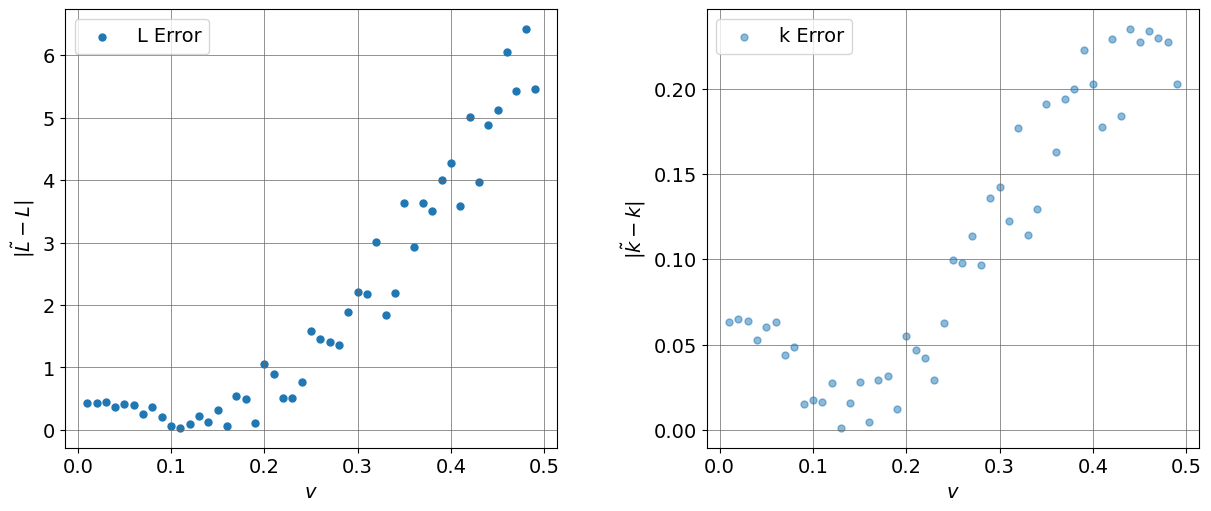

In [66]:

###
# produce a visual.

fig,ax = plt.subplots(1,2, figsize=(12,5), constrained_layout=True, 
                      gridspec_kw={'wspace':0.1})
ax[0].scatter(v_s, errors_L, marker='o', s=25, label='L Error')

ax[1].scatter(v_s, errors_k, marker='o', s=25, label='k Error', alpha=0.5)

ax[0].legend()
ax[0].set(xlabel=r'$v$', ylabel=r'$|\tilde{L}-L|$')
# ax[0].axhline(10, c='k', ls='--')

ax[1].legend()
ax[1].set(xlabel=r'$v$', ylabel=r'$|\tilde{k}-k|$')

ax[0].grid(c='#666', lw=0.5)
ax[1].grid(c='#666', lw=0.5)

fig.savefig('HW3_Q02.png', dpi=300, bbox_inches='tight')
fig.savefig('HW3_Q02.pdf', dpi=300, bbox_inches='tight')
fig.show()